# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [71]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fuzzywuzzy
from fuzzywuzzy import process
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
# Read in the data set
boston_data = pd.read_csv('boston.csv', keep_default_na=False)
boston_data.head(20)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [35]:
# Clean and pre-process the data if neccessary
# There was an error before so turning all data to the same data type. 
# https://www.linkedin.com/pulse/change-data-type-columns-pandas-mohit-sharma/

boston_data = boston_data.apply(pd.to_numeric, errors='coerce')




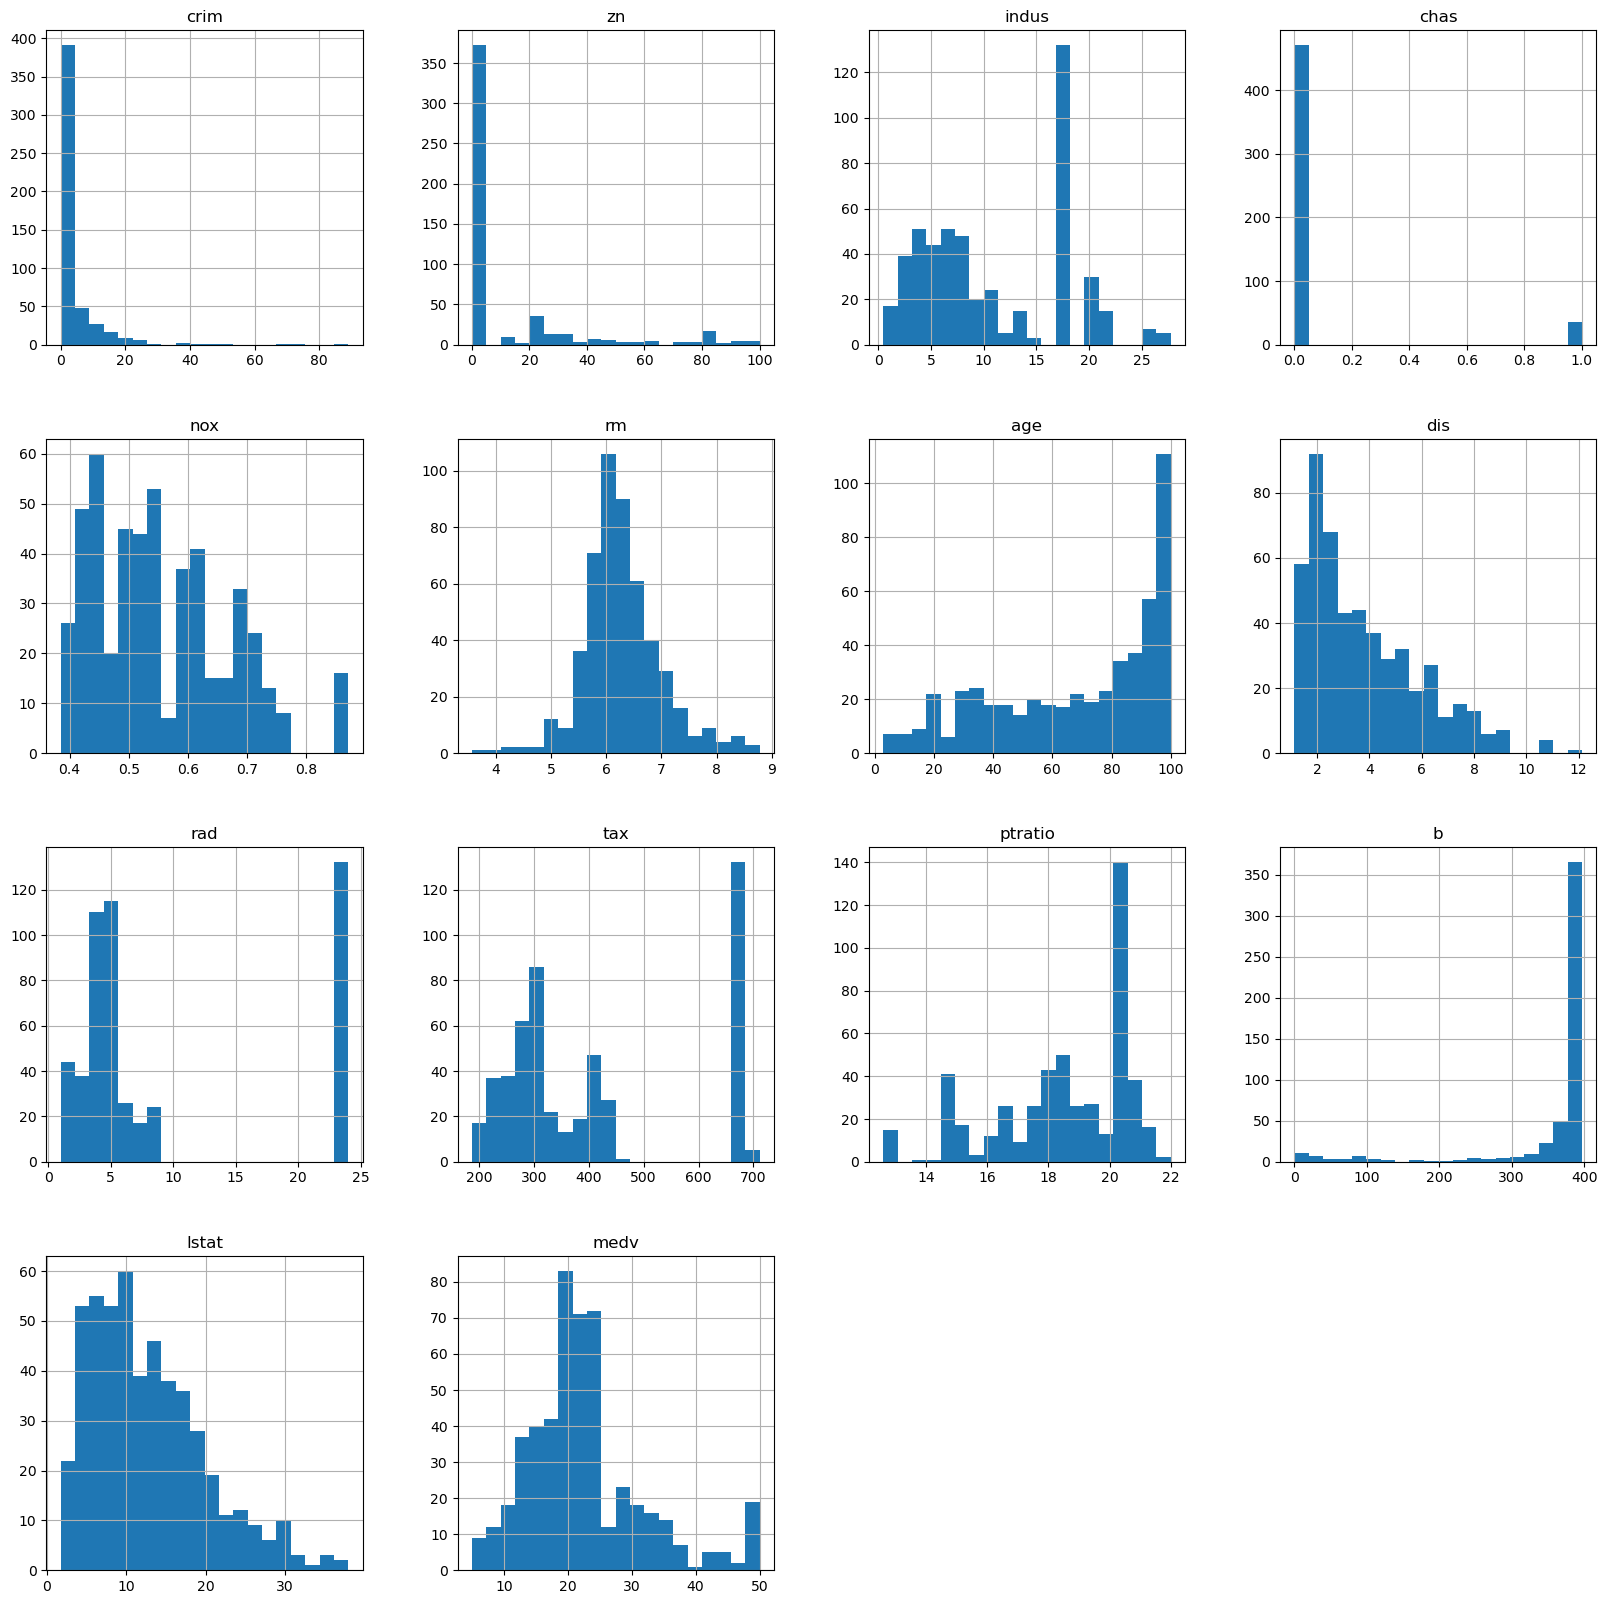

             rm     lstat
rm     1.000000 -0.613808
lstat -0.613808  1.000000


In [46]:
# Explore the data with visualisations such as histograms and correlation matrices
# Make histograms for each variable.
boston_data.hist(bins=20, figsize=(20,20))
plt.show()


# Make a correlation matrix for the rm and lstat.
selected_columns = ['rm', 'lstat']
selected_data = boston_data[selected_columns]
correlation_matrix = selected_data.corr()
print(correlation_matrix)

# There is a slight negative correlation betweem rm and lstat.
# As the percentage of lower status population decreases, the avg. number of rooms per dwelling increases.
# Therefore as the avg. number of rooms per dwelling increases, the % of lower status population decreases.


In [61]:
# Split the independent variables from the dependent variable

x = boston_data[['crim','zn','indus','chas','nox','rm','lstat','age','dis','rad','tax','ptratio','b']]
y = boston_data['medv']



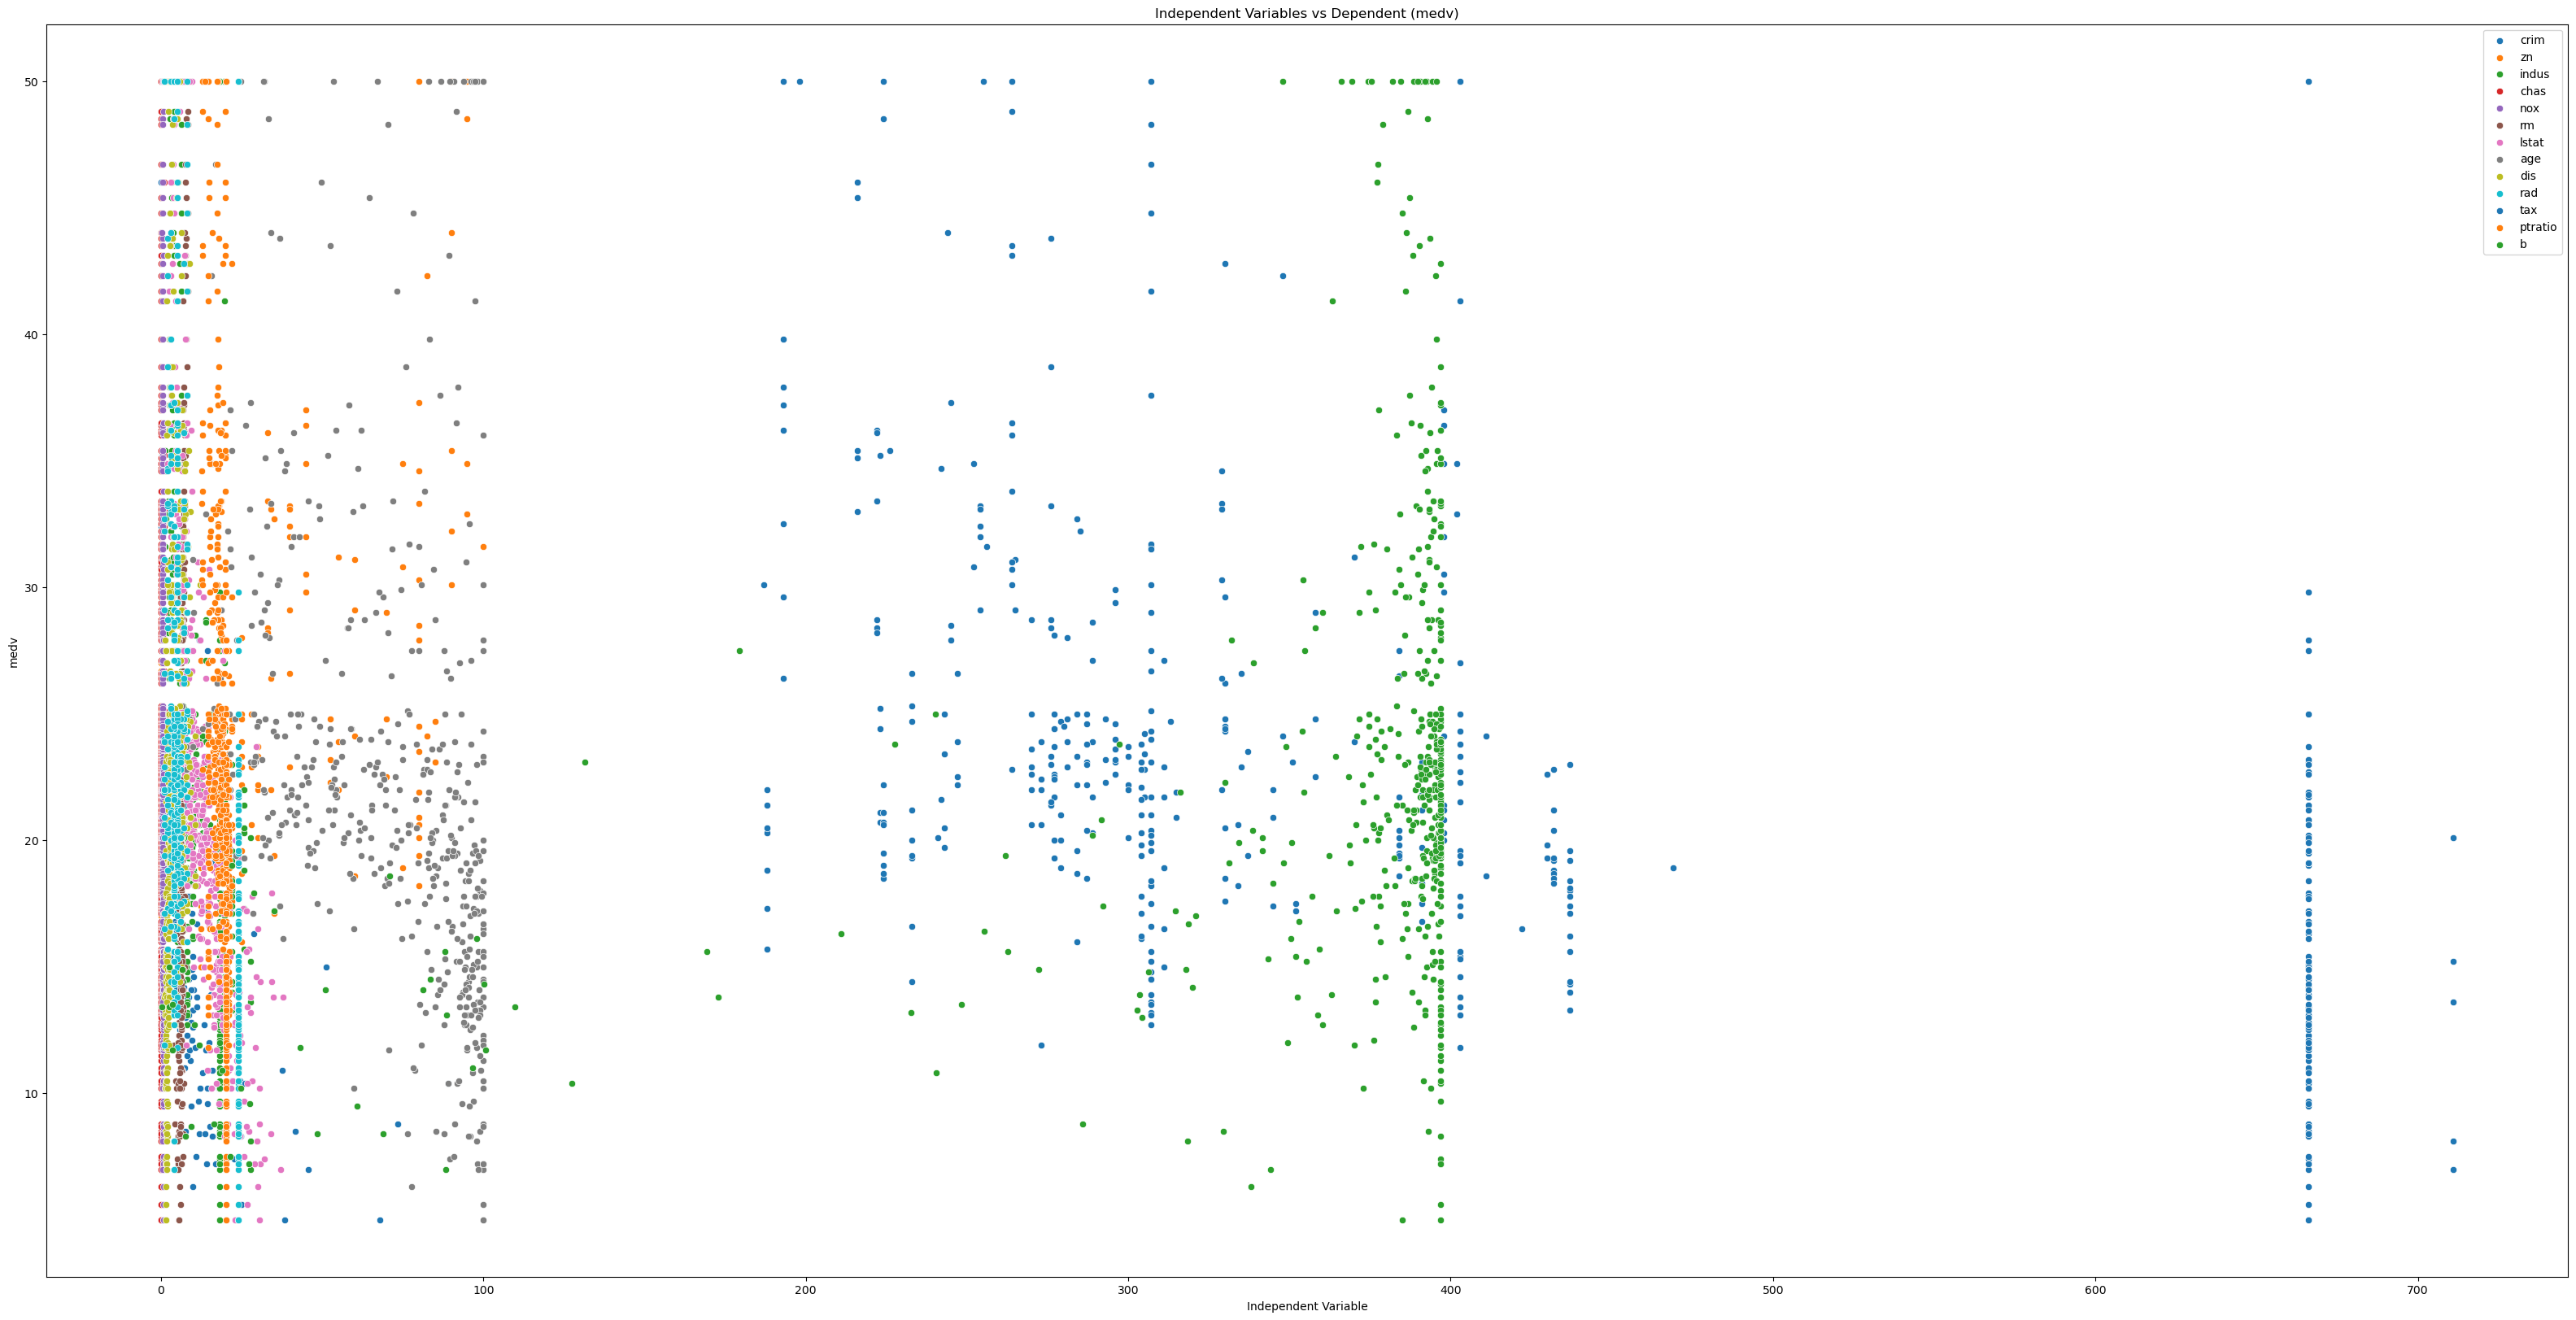

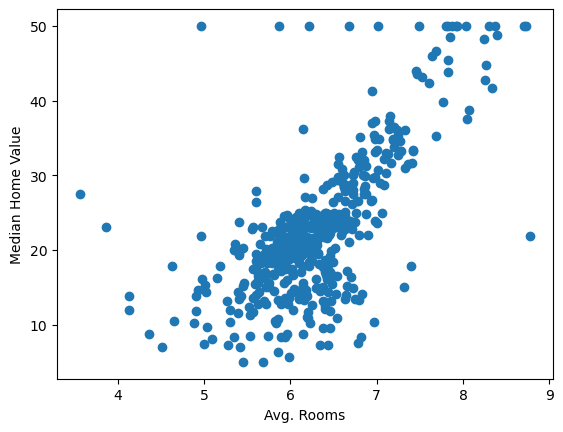

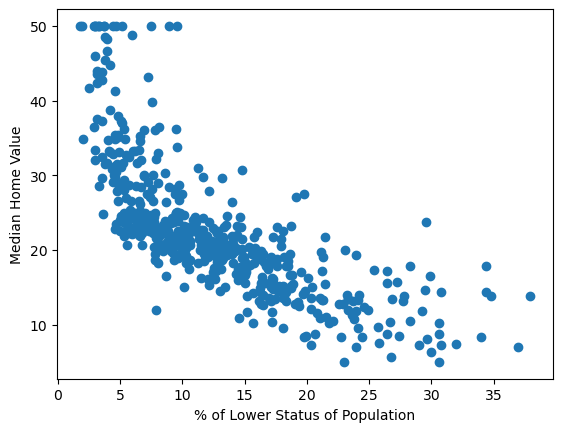

In [62]:
# Explore relationships between the independent and dependent variables

plt.figure(figsize=(40,20))
for var in x:
    sns.scatterplot(x=x[var], y=y, label=var)

plt.legend()
plt.title('Independent Variables vs Dependent (medv)')
plt.xlabel('Independent Variable')
plt.ylabel('medv')

plt.show()

# Narrow down to a rm vs medv scatterplot
plt.scatter(boston_data['rm'], boston_data['medv'])
plt.xlabel('Avg. Rooms')
plt.ylabel('Median Home Value')
plt.show()

# Narrow down to a lstat vs medv scatterplot
plt.scatter(boston_data['lstat'], boston_data['medv'])
plt.xlabel('% of Lower Status of Population')
plt.ylabel('Median Home Value')
plt.show()

# There is a negative correlation betweem the median value and lstat.
# As the percentage of lower status population decreases, the median value increases.
# Therefore as the lower status population increases, the median value decreases.


# There is a positive relationship between rm and medv.
# As the avg. number of rooms increases, the median value does too and vise versa.


In [82]:
# Create a training and test set with a 75:25 split ratio
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

print('Training:', x_train.shape, y_train.shape)
print('Testing:', x_test.shape, y_test.shape)


Training: (379, 13) (379,)
Testing: (127, 13) (127,)


In [64]:
# Build a multiple linear regression model using 'rm' and 'lstat'
# Segregate the relevant vairables.
selected_variables = ['rm','lstat']
x_train_multi = x_train[selected_variables]
x_test_multi = x_test[selected_variables]

# Fit the model.
multiple_model = LinearRegression()
multiple_model.fit(x_train_multi, y_train)


LinearRegression()

In [65]:
# Print the model intercept and coefficients
print('Intercept =', multiple_model.intercept_)
print('Coefficient =', multiple_model.coef_)

Intercept = -2.3205707325416185
Coefficient = [ 5.27320382 -0.64863772]


In [66]:
# Generate predictions for the test set
y_pred = multiple_model.predict(x_test_multi)
print('Predictions =')
print(y_pred)

Predictions =
[25.64861998 31.02604952 17.50812413 26.08093021 19.6828203  23.02568254
 16.97562726 14.56510235 22.1782484  20.16605016 17.43667726 18.24803999
 -2.47758553 22.53784601 20.16386984 26.92327611 17.27754341  3.55137694
 37.2794553  18.53439304 26.30969852 27.19663121 13.14603023 26.17333529
 19.16667921 14.53081816 22.75162525 21.02153283 17.90575061 19.08658035
 17.53323285 26.89484542 27.52467784 19.34472978 15.50551562 17.54216028
 32.95338869 22.27121283 20.14710826 25.71985871 12.38979647 28.91136019
 38.17627211 18.68706368 25.80307986 16.70705131 15.83946209 27.15873269
 19.63296877 29.12052853 20.75868848 31.44586634 17.92494902 28.46197305
 35.02056659 24.1013047  19.71258405 31.69891705 25.1300336  15.26188437
 27.17477515 32.78493631 29.79058286 18.86745436 28.81081611 10.88238554
 20.69765342 26.55231425 29.6540935  16.86149224 19.01196283 28.25309909
 13.11767308 25.36825503 23.39539133  6.59238186 22.20157414 36.61858914
 18.51926514 10.68070861 23.01070818 

In [75]:
# Evaluate the model
# Calculate the R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared =', r2)

print('There is a 57% R-squared which means there is just over half of the model which is explained.')
print('There is moderate variance and the model fits well.')

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print('\nMean squared error =', mse)
print('The MSE is approx. 29.5 meaning that there is 29.5 square difference between the actual values.')

R-squared = 0.5780826814921924
There is a 57% R-squared which means there is just over half of the model which is explained.
There is moderate variance and the model fits well.

Mean squared error = 29.545664673377924
The MSE is approx. 29.5 meaning that there is 29.5 square difference between the actual values.


<function matplotlib.pyplot.show(close=None, block=None)>

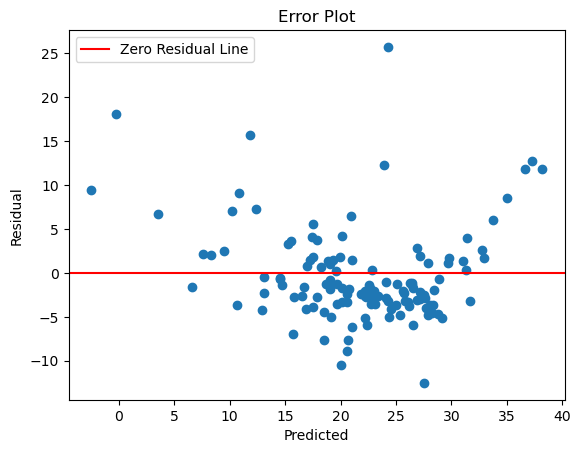

In [79]:
# Generate a plot
# Calculate the actual and predicted.
residual_plot = y_test - y_pred

# Create a plot to show predicted values vs the difference between the actual and predicted (residual)
# See Sources at end of notebook.
plt.scatter(y_pred, residual_plot)
plt.axhline(y=0, color='red', label='Zero Residual Line')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Error Plot')
plt.legend()
plt.show

In [81]:
# Print the coefficients
#print('Coefficient =', residual_plot.coef_)
coefficients = multiple_model.coef_
intercept = multiple_model.intercept_

# Creating a loop to print the coefficient for selected variables.
# Using zip to combine elements.
for selected_variables, coef in zip(selected_variables, coefficients):
    print(f"{selected_variables}: {coef}")



rm: 5.273203817423058
lstat: -0.6486377188641349


**Interpret coefficients in the context of the prediction:**

The rm coefficient is approx. 5.27 meaning that there is a positive relationship between the median value. There is a 5.27 increase of the medv with each rm increase. This makes sense as the more rooms the higher value is a common scenario aside from a few anomolies with less rooms for a high median value which could be due to location or newly renovated etc. 

The lstat coefficitent is approx. -0.65 meaning that there is a negative relationship between it and the median value. Each time the lstat increase, the median value decreases. This also makes sense as the a lower status would suggest lower affordability and therefore if there is a high percentage of people with a lwoer status, the median value will be lower.


**Summarise findings**'

To Summarise, there is a slight negative correlation betweem rm and lstat. As the percentage of lower status population decreases, the avg. number of rooms per dwelling increases, therefore as the avg. number of rooms per dwelling increases, the % of lower status population decreases.

There is a negative correlation betweem the median value and lstat as, as the percentage of lower status population decreases, the median value increases and the lower status population increases, the median value decreases.

There is a positive relationship between rm and medv as the avg. number of rooms increases, the median value does too and vise versa.

This circles back to the connection between rm and lstat as if avg. number of rooms increases the median value and a high percentage of lower status decreases the median value, then as the lstat increase, the rm must decrease to fit the data found above.

Sources/Referencing:
https://statisticsbyjim.com/regression/interpret-r-squared-regression/
https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/
